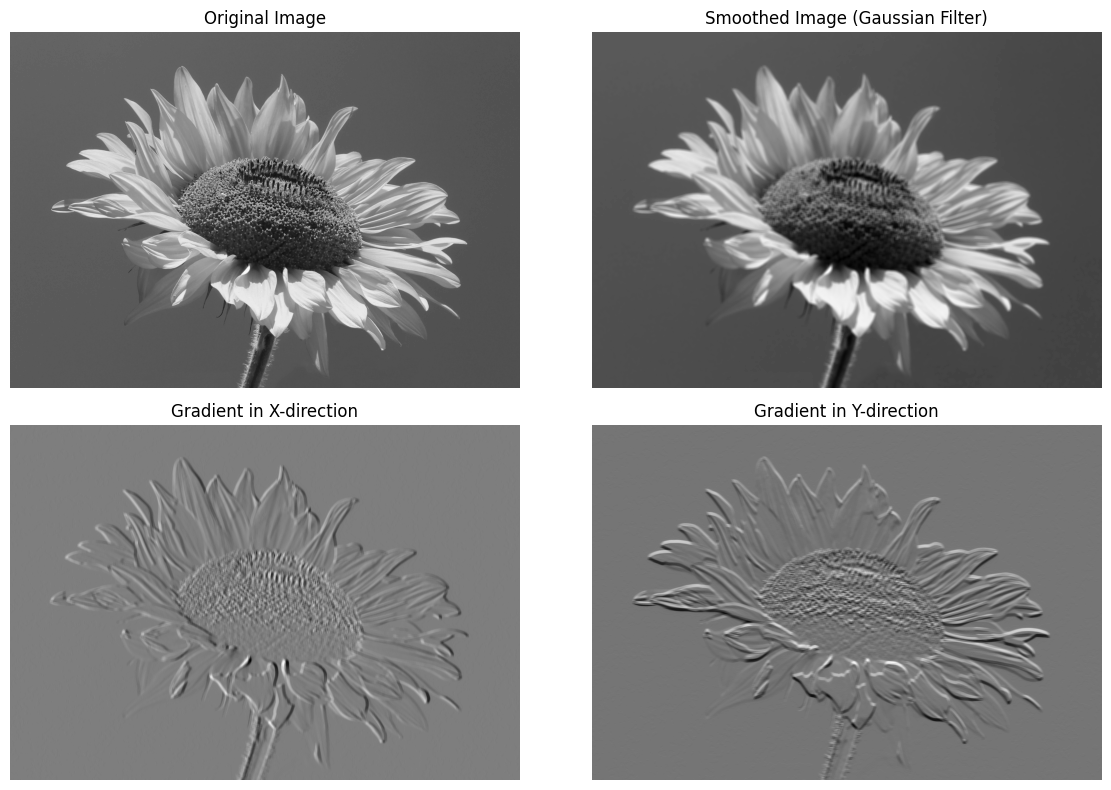

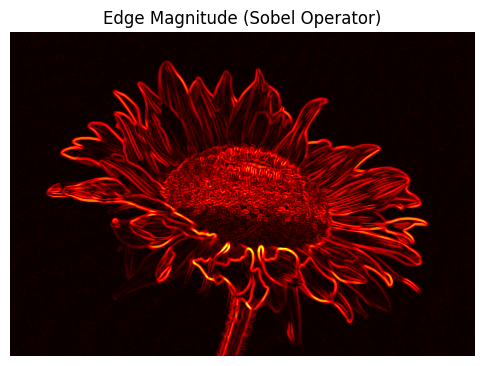

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r'image.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded
if image is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    # Step 1: Apply Gaussian smoothing to reduce noise
    smoothed_image = cv2.GaussianBlur(image, (15, 15), 21)

    # Step 2: Compute the gradient in the x-direction using Sobel operator
    grad_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)

    # Step 3: Compute the gradient in the y-direction using Sobel operator
    grad_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)

    # Step 4: Compute the magnitude of gradients
    magnitude = cv2.magnitude(grad_x, grad_y)

    # Step 5: Normalize the magnitude to display
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Display results
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
    plt.subplot(2, 2, 2), plt.imshow(smoothed_image, cmap='gray'), plt.title('Smoothed Image (Gaussian Filter)'), plt.axis('off')
    plt.subplot(2, 2, 3), plt.imshow(grad_x, cmap='gray'), plt.title('Gradient in X-direction'), plt.axis('off')
    plt.subplot(2, 2, 4), plt.imshow(grad_y, cmap='gray'), plt.title('Gradient in Y-direction'), plt.axis('off')
    plt.tight_layout()

    # Display the magnitude of edges
    plt.figure(figsize=(6, 6))
    plt.imshow(magnitude, cmap='hot')
    plt.title('Edge Magnitude (Sobel Operator)')
    plt.axis('off')
    plt.show()
